### Применение TSLearn к анализу временной серии

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.datasets import CachedDatasets

In [3]:
from load_csv import df
# clear all indexes
df = df.reset_index(drop=True)
df1 = df[['Date','Infections']]
df1.reset_index(drop=True)
df1['Inf_day'] = df1['Infections'].diff().fillna(df1['Infections'])
l = df1['Date']
ts = df1['Inf_day']
data = ts.values
X = data.reshape(data.shape[0])
print(X)


            Infections  Dead  Recover  Infect_by_date  inf_day
Date                                                          
28.03.2020           6     0        0               6      NaN
29.03.2020           6     0        0               6      0.0
30.03.2020           9     1        0               8      3.0
31.03.2020           9     1        0               8      0.0
01.04.2020           9     2        0               7      0.0
['Infections', 'Dead', 'Recover', 'Infect_by_date', 'inf_day']
Date
28.03.2020   2020-03-28
29.03.2020   2020-03-29
30.03.2020   2020-03-30
31.03.2020   2020-03-31
01.04.2020   2020-04-01
                ...    
30.05.2023   2023-05-30
06.06.2023   2023-06-06
13.06.2023   2023-06-13
20.06.2023   2023-06-20
27.06.2023   2023-06-27
Name: Date, Length: 1149, dtype: datetime64[ns]
Date
28.03.2020       0.0
29.03.2020       1.0
30.03.2020       2.0
31.03.2020       3.0
01.04.2020       4.0
               ...  
30.05.2023    1158.0
06.06.2023    1165.0
13.06.

C:\Users\Alex\AppData\Local\Temp\ipykernel_147272\3674077191.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Inf_day'] = df1['Infections'].diff().fillna(df1['Infections'])


In [4]:
# Normalize the data
import matplotlib.pyplot as plt
# Normalize the data
scaler = TimeSeriesScalerMeanVariance()
X_normalized = scaler.fit_transform([X])

X_n = X_normalized[0]
                                    
print(X_n)
#plt.plot(X_normalized)тся


[[-0.7141232 ]
 [-0.75404669]
 [-0.73408494]
 ...
 [-0.60100664]
 [-0.68085362]
 [-0.57439098]]


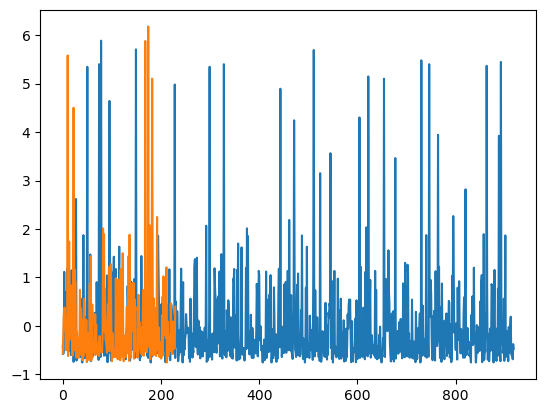

In [5]:
from tslearn.utils import to_time_series_dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_n, X_n, test_size=0.2, random_state=42)
plt.plot(X_train)
plt.plot(X_test)


In [6]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Set the number of units 20 - 100
UNITS = 50
UNITS2 = 20

# Build the GRU model
model = Sequential()
model.add(LSTM(units=UNITS, activation='relu',return_sequences=True, input_shape=(X_normalized.shape[1], X_normalized.shape[2])))
model.add(LSTM(units=UNITS, activation='relu', return_sequences=False))
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mse')

In [7]:
EPOCHS = 100
BATCH_SIZE = 30

# Train the model
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/100
31/31 [==============================] - 3s 20ms/step - loss: 0.9698 - val_loss: 0.9976
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.8932 - val_loss: 0.8521
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 0.6547 - val_loss: 0.4449
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2006 - val_loss: 0.0355
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0285 - val_loss: 0.0311
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0171 - val_loss: 0.0200
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0148 - val_loss: 0.0188
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0114 - val_loss: 0.0140
Epoch 9/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0122
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0087
Epoch 11

In [9]:
# Make predictions on the entire dataset
print(X_n)


[[-0.7141232 ]
 [-0.75404669]
 [-0.73408494]
 ...
 [-0.60100664]
 [-0.68085362]
 [-0.57439098]]


In [10]:
# y_pred = model.predict(X_n.reshape(X_n.shape[0], X_n.shape[1], 1))
y_pred = model.predict(X_n)
# Print the predictions

print(y_pred)

36/36 [==============================] - 0s 1ms/step
[[-0.7156096]
 [-0.7562151]
 [-0.7358977]
 ...
 [-0.6011445]
 [-0.6818582]
 [-0.5743224]]


In [11]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE) as a performance metric
mse = mean_squared_error(X_n, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.787011527908909e-06


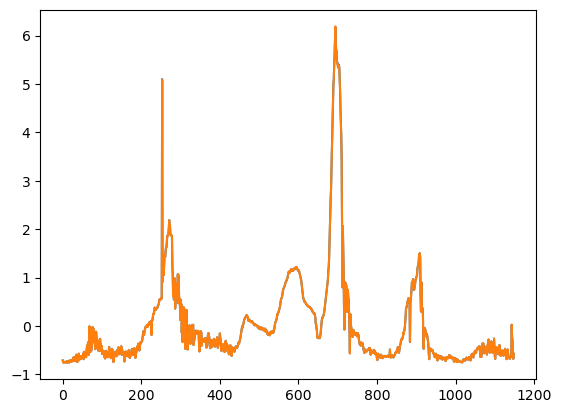

In [12]:
plt.plot(X_n)
plt.plot(y_pred)

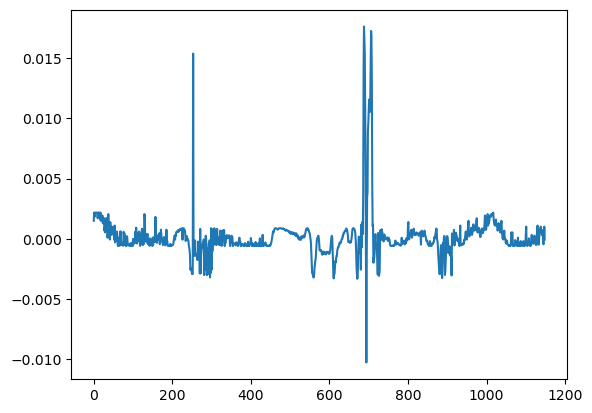

In [13]:
plt.plot(X_n-y_pred)

In [14]:
# Calculate mean and variance for inverse scaling

mu = np.mean(X)
var = np.var(X)
print(mu,var)

113.32375979112271 22586.319896742993


In [15]:
# Inverse transform predictions to get them in their original scale
y_pred_original_scale = (y_pred * np.sqrt(var)) + mu

In [16]:
import pandas as pd
df_lstm = pd.DataFrame()

df_lstm['X'] = X

df_lstm['y_pred_original_scale'] = y_pred_original_scale

df_lstm['Err'] = df_lstm['y_pred_original_scale'] - df_lstm['X']

df_lstm['Err_Sqr'] = df_lstm['Err']**2

MSE = df_lstm['Err_Sqr'].sum() / len(df_lstm)

print(df_lstm)
print(MSE)



         X  y_pred_original_scale       Err   Err_Sqr
0      6.0               5.776611 -0.223389  0.049902
1      0.0              -0.325882 -0.325882  0.106199
2      3.0               2.727562 -0.272438  0.074222
3      0.0              -0.325882 -0.325882  0.106199
4      0.0              -0.325882 -0.325882  0.106199
...    ...                    ...       ...       ...
1144  76.0              76.045288  0.045288  0.002051
1145  68.0              68.069702  0.069702  0.004858
1146  23.0              22.979279 -0.020721  0.000429
1147  11.0              10.849030 -0.150970  0.022792
1148  27.0              27.010307  0.010307  0.000106

[1149 rows x 4 columns]
0.0855341955168678


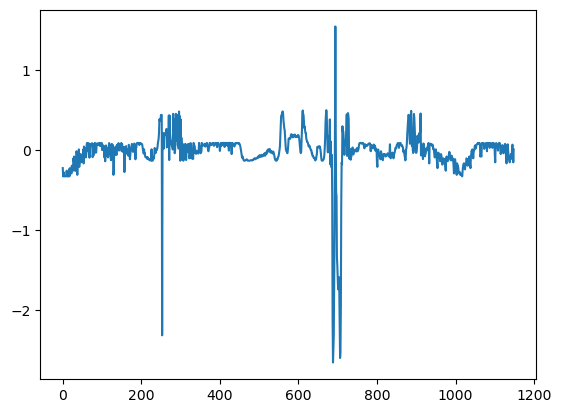

In [17]:
plt.plot(df_lstm['Err'])

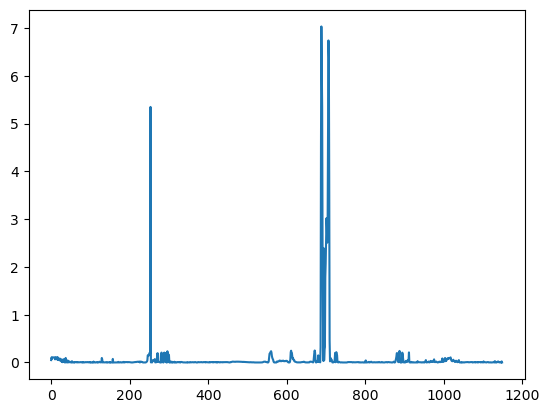

In [18]:
plt.plot(df_lstm['Err_Sqr'])

(array([  6.,   3.,   7.,   2.,   3., 102., 972.,  53.,   0.,   1.]),
 array([-2.65222168, -2.23233643, -1.81245117, -1.39256592, -0.97268066,
        -0.55279541, -0.13291016,  0.2869751 ,  0.70686035,  1.12674561,
         1.54663086]),
 <BarContainer object of 10 artists>)

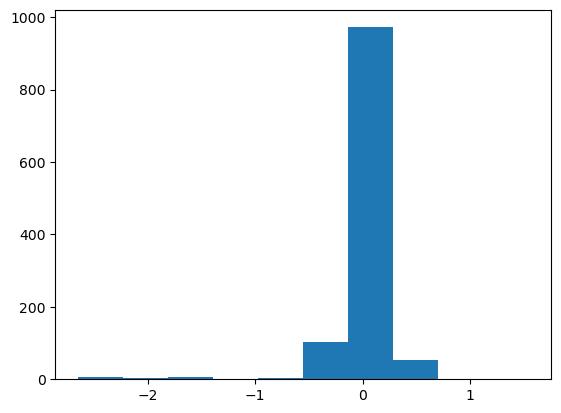

In [19]:
plt.hist(df_lstm['Err'])

In [20]:
from keras.models import save_model

# Save the model to a file
model.save("my_lstm_model_2layer.h5")
